In [17]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn

# Import your ResNet models and utility functions
from models.resnet import resnet18  # Import ResNet-18 model
from utils.training import train_model  # Import the train_model function
from utils.visualization import plot_metrics  # Assuming you have a function to plot metrics
from utils.dataset import get_CIFAR_10  # Import the get_CIFAR_10 function to load data


In [18]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


True
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [19]:
train_loader, val_loader = ds.get_CIFAR_10()

Files already downloaded and verified
Files already downloaded and verified


### Evaluating the Model on the Validation Set
Now that the model is trained, let's evaluate its performance on the validation (test) set to see how well it generalizes to unseen data.

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = cnn.CustomCNN()
# Train the model for 1 epoch (modify num_epochs to train longer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
tr.train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, save_path='mini_cnn_model.pth')

Using device: cuda
Tracking training loss: 2.3209283351898193
Tracking training accuracy: 0.109375
Tracking training loss: 2.597200632095337
Tracking training accuracy: 0.1875
Tracking training loss: 2.396986246109009
Tracking training accuracy: 0.203125
Tracking training loss: 2.574026584625244
Tracking training accuracy: 0.125
Tracking training loss: 2.3922863006591797
Tracking training accuracy: 0.140625
Tracking training loss: 2.372793197631836
Tracking training accuracy: 0.203125
Tracking training loss: 2.0708861351013184
Tracking training accuracy: 0.1875
Tracking training loss: 2.429229736328125
Tracking training accuracy: 0.1875
Tracking training loss: 2.1953887939453125
Tracking training accuracy: 0.265625
Tracking training loss: 1.922336220741272
Tracking training accuracy: 0.328125
Tracking training loss: 2.0299558639526367
Tracking training accuracy: 0.265625
Tracking training loss: 2.269892454147339
Tracking training accuracy: 0.171875
Tracking training loss: 2.16767454147

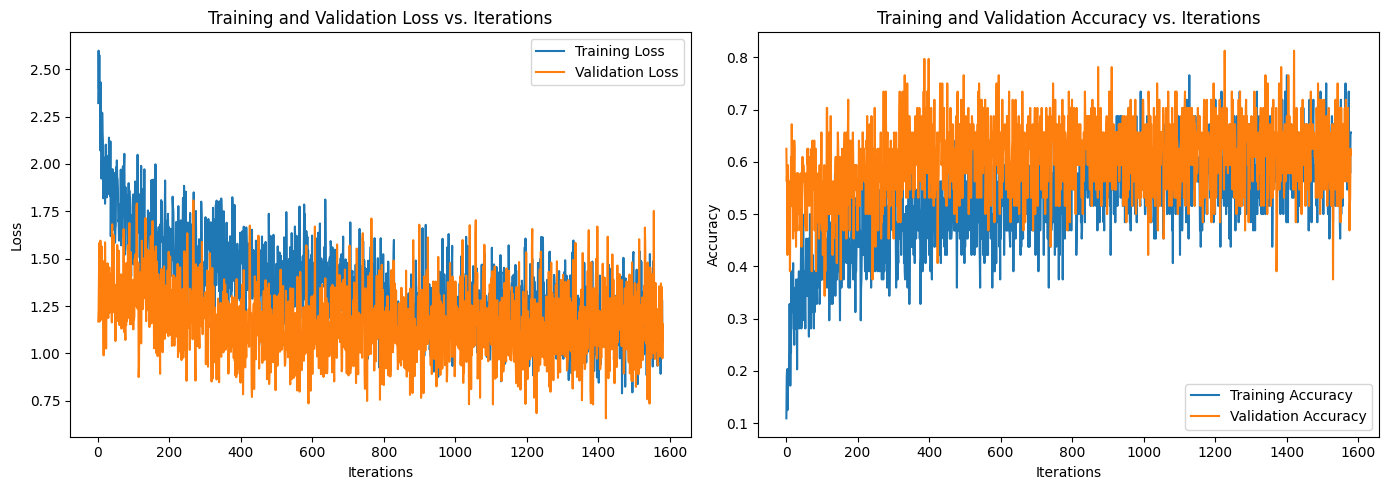

In [21]:
metrics = model.get_metrics_per_iteration()
# Plot the metrics
vis.plot_metrics(metrics)

In [23]:
# # Load the saved model for later use
# model = cnn.CustomCNN()  # Ensure the model architecture matches
# model.load_state_dict(torch.load('mini_cnn_model.pth'))
# model.to(device)
# model.eval()
# print("Model loaded successfully for evaluation.")